## パーセプトロン Perceptron

- 深層学習 deep learningの原型
- ニューロンの働きがベース
 1. 樹状突起 dendriteで信号を受ける。
 2. 信号をニューロン細胞で処理する。
 3. 閾値を超えたものは軸索 axonに流す
- パーセプトロン
 1. 入力
 2. 信号データを合算し、バイアスを加える
 3. 閾値を超えた場合、１を出力する。

参考図 Perceptrons - the most basic form of a neural network (ref. https://appliedgo.net/perceptron/ )


<img src="https://appliedgo.net/media/perceptron/neuron.png" width=500>

入力信号値0.7, 0.6, 1.4を合算(sum)し、バイアスを加えた、一定の閾値を超えた場合、１を出力する。。

<img src="http://symbolics.jp/lecture/hosei2021/IT/perceptron.gif" width=500>

**モデル：線形回帰を想定したパーセプトロン**

- 超平面による線形分離。例. $b+a_1 x_1+a_2 x_2 = 0$
- 同式を下図に合うよう再定式化を行う。$w_0+ w_1 x_1 + w_2 x_2 = 0$
- 図中、$\Sigma \  w_i * x_i$を**内積**と呼ぶ。

<img src="https://miro.medium.com/max/1400/1*gKFs7YU44vJFiS2rF3-bpg.png" width=450>

In [ ]:
from sklearn.datasets import make_blobs # Gaussian data
from sklearn.model_selection import train_test_split
# generate 2d classification dataset
data, labels = make_blobs(n_samples=200, centers=2, n_features=2)

In [ ]:
from matplotlib import pyplot
from pandas import DataFrame
df = DataFrame(dict(x1=data[:,0], x2=data[:,1], label=labels))
df.head()

,x1,x2,label
0,-4.623523,-0.769881,0
1,-6.821416,-2.271614,0
2,-6.837898,-1.391667,0
3,-7.182932,-2.027168,0
4,-4.040659,0.326770,1


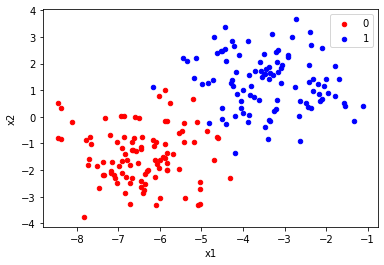

In [ ]:
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
pyplot.show()

**モデル**の用意

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron()

**学習**

データセットを学習用セット X_train, Y_train、テスト用セットX_test, Y_testに分離。この際、テストデータの割合を全データの20%とする。

In [ ]:
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

X_train, X_test, Y_train, Y_test = datasets

In [ ]:
model.fit(X_train, Y_train)

# we can get the follwoing parameters of hyperplain
(a1, a2) = model.coef_[0]
b = model.intercept_[0]
print('a1={a1}, a2={a2}, b={b}'.format(a1=a1, a2=a2, b=b))

a1=6.776120510882081, a2=-11.01155701770735, b=1.0


In [ ]:
model.score(X_test, Y_test)

1.0

## 多層パーセプトロン Multiple Layer Perceptron (MLP)

- 各層にパーセプトロンを複数配備
- 層を深くしたものが深層学習モデル(DLmodel)
- 実際のDLmodelは多くの点で多層パーセプトロンと異なるが、ベースの計算に内積計算を使い、次段への入力に活性化関数を用いる点は共通する。
- 基本、層間は全結合

<img src="https://slidetodoc.com/presentation_image_h/1c119110b17f77dafaec3fe33da124d5/image-10.jpg" width=500>

ref. https://slidetodoc.com/neural-networks-multilayer-perceptron-mlp-oscar-herrera-alcntara/

**学習データ**

- 学習データ train_images, train_labels
- テストデータ test_images, test_labels

In [ ]:
from tensorflow import keras

# classifing data comes from 'keras.datasets.fashion_mnist'
(train_images, train_labels), (test_images, test_labels) = \
 keras.datasets.mnist.load_data()

print(train_images.shape)
print(test_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


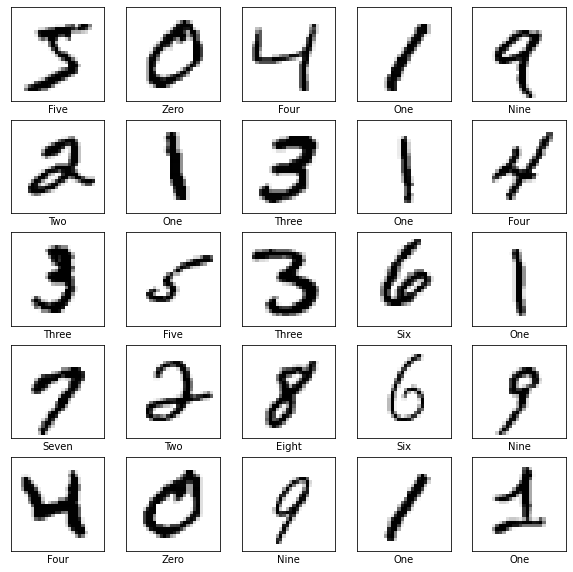

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**モデル**clfを用意。

In [ ]:
from sklearn.neural_network import MLPClassifier
#(100, 100, ) Two Hidden Layers, each neurons being 100.
clf = MLPClassifier(hidden_layer_sizes=(100, 100, ), 
                    activation = 'relu', # f(x).max(0, x)
                    solver = 'adam',
                    verbose = True,
                    random_state=0)

**学習**

元の二次元データをScikit-Learn用一次元データに変更。

In [ ]:
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

In [ ]:
%time clf.fit(train_images, train_labels)

Iteration 1, loss = 2.59185585
Iteration 2, loss = 0.66867341
Iteration 3, loss = 0.38349983
Iteration 4, loss = 0.26355598
Iteration 5, loss = 0.20670251
Iteration 6, loss = 0.16452958
Iteration 7, loss = 0.15309960
Iteration 8, loss = 0.13418198
Iteration 9, loss = 0.12279241
Iteration 10, loss = 0.12284428
Iteration 11, loss = 0.12129835
Iteration 12, loss = 0.10541617
Iteration 13, loss = 0.10053298
Iteration 14, loss = 0.09860693
Iteration 15, loss = 0.08968690
Iteration 16, loss = 0.09039436
Iteration 17, loss = 0.08469909
Iteration 18, loss = 0.08259331
Iteration 19, loss = 0.07535310
Iteration 20, loss = 0.07112779
Iteration 21, loss = 0.06435767
Iteration 22, loss = 0.07809541
Iteration 23, loss = 0.06375847
Iteration 24, loss = 0.05814203
Iteration 25, loss = 0.06209843
Iteration 26, loss = 0.05970669
Iteration 27, loss = 0.05312314
Iteration 28, loss = 0.04671942
Iteration 29, loss = 0.04173358
Iteration 30, loss = 0.05051590
Iteration 31, loss = 0.05088552
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=0, verbose=True)

In [ ]:
clf.score(test_images, test_labels)

0.9682

**予測**

- ニューラルネットワークの特徴として学習時間に比して、予測時間は圧倒的に短い。

In [ ]:
for d, l in zip(test_images[:10], test_labels[:10]):
  print('予測={p}, 正解={d}'.format(p=clf.predict([d]), d=l))

予測=[7], 正解=7
予測=[2], 正解=2
予測=[1], 正解=1
予測=[0], 正解=0
予測=[4], 正解=4
予測=[1], 正解=1
予測=[4], 正解=4
予測=[9], 正解=9
予測=[5], 正解=5
予測=[9], 正解=9
